In [1]:
import torch

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\jobif/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-8-8 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
#making detections with images

In [4]:
img= 'https://people.com/thmb/qTOEpJClCgNxXccopOJOex-vzlg=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(499x0:501x2):format(webp)/POTY-cover-tout-d827554fa3c949c59a9d494773a7c409.jpg'

In [5]:
results = model(img)
results.print()

image 1/1: 500x750 4 persons, 1 tie
Speed: 1539.7ms pre-process, 235.3ms inference, 186.1ms NMS per image at shape (1, 3, 448, 640)


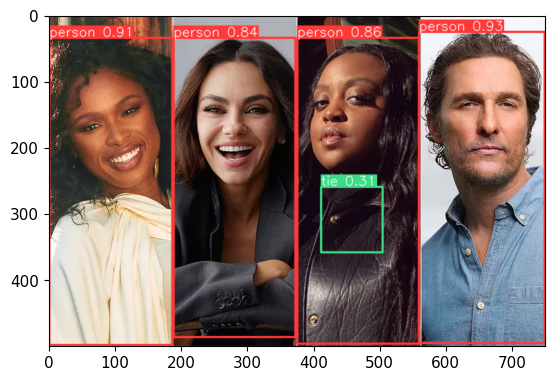

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
img='https://economictimes.indiatimes.com/thumb/msid-60457478,width-1200,height-900,resizemode-4,imgsize-57900/indias-traffic-is-so-bad-its-changing-the-cars-people-buy.jpg?from=mdr'

In [8]:
results = model(img)
results.print()

image 1/1: 900x1200 12 persons, 22 cars, 4 motorcycles, 6 buss
Speed: 441.3ms pre-process, 168.1ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


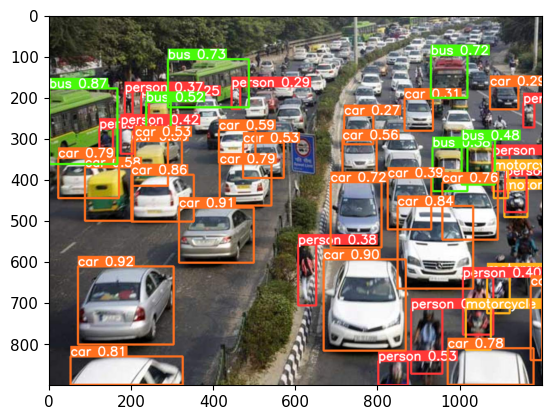

In [9]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

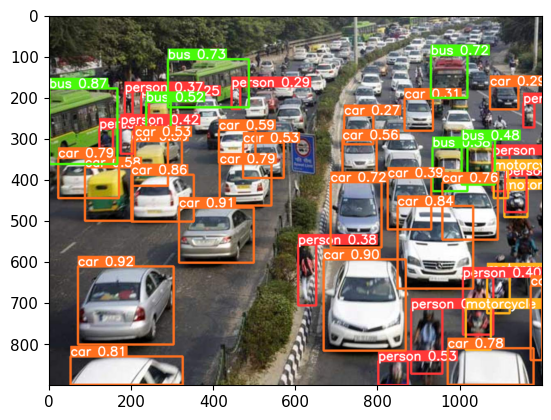

In [10]:
plt.imshow(np.squeeze(results.render()))

In [ ]:
# REAL TIME DETECTIONS USING PRETRAINED YOLOV5 MODEL

In [13]:
cap= cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read() #ret holds the boolean value whether a frame was detected. frame is the image.
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render())) # render holds the image in array format. squeeze extracts the information

    #press q on keyboard to exit
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() # destroys the popup

In [ ]:
#TRAIN Drowsy and Awake FROM SCRATCH

In [4]:
import uuid# unique identifier
import os
import time

In [3]:
torch.cuda.mem_get_info()

(1742598759, 2147352576)

In [29]:
torch.cuda.empty_cache()

In [6]:
!cd yolov5 & python train.py --img 480 --batch 10 --epochs 200 --data drowsy_dataset2.yaml --weights yolov5s.pt --workers 3

train: weights=yolov5s.pt, cfg=, data=drowsy_dataset2.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=200, batch_size=10, imgsz=480, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=3, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   05e4c05..0897415  master     -> origin/master
github:  YOLOv5 is out of date by 3 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-200-g05e4c05 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt',force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\jobif/.cache\torch\hub\master.zip
YOLOv5  2023-8-8 Python-3.11.3 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce MX150, 2048MiB)

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [8]:
path = "/Users/jobif/yolov5"
import os
img=os.path.join(path,'drowsydata2/data','images','224101036.person03.awake.70948730dd1211ed8d5f2d5469c8be08.jpg')

In [9]:
results=model(img)

In [10]:
results.print()

image 1/1: 1920x1080 1 awake
Speed: 365.3ms pre-process, 224.1ms inference, 265.0ms NMS per image at shape (1, 3, 640, 384)


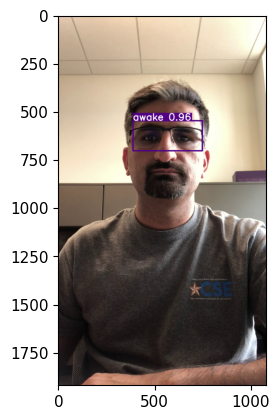

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
# real time detection
cap= cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    #make detections
    results = model(frame)
    
    cv2.imshow('YOLO',np.squeeze(results.render()))

    #press q on keyboard to exit
    if cv2.waitKey(10) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()